In [1]:
# imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# local
import wrangle_zillow as w

# Exercises
Sourcing the Zillow database as the data source



In [2]:
df = w.wrangle_zillow()
df = w.clean_outliers_qtl(df)
df

,yearbuilt,age,old_home,bathroomcnt,bedroomcnt,roomcnt,garagecarcnt,has_garage,calculatedfinishedsquarefeet,latitude,...,airconditioningdesc,heatingorsystemdesc,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,trx_month,trx_date,transactiondate
0,1998.0,19.0,False,3.5,4.0,8.0,2.0,True,3100.0,33634931.0,...,None,Yes,1023282.0,485713.0,537569.0,11013.72,0.025595,1,01-01,2017-01-01
1,1967.0,50.0,True,1.0,2.0,5.0,1.0,True,1465.0,34449266.0,...,None,Yes,464000.0,88000.0,376000.0,5672.48,0.055619,1,01-01,2017-01-01
2,1962.0,55.0,True,2.0,3.0,6.0,2.0,True,1243.0,33886168.0,...,None,Yes,564778.0,85289.0,479489.0,6488.30,0.005383,1,01-01,2017-01-01
3,1970.0,47.0,True,3.0,4.0,7.0,0.0,False,2376.0,34245180.0,...,None,Central,145143.0,108918.0,36225.0,1777.51,-0.103410,1,01-01,2017-01-01
4,1964.0,53.0,True,3.0,3.0,6.0,0.0,False,1312.0,34185120.0,...,Central,Central,119407.0,73681.0,45726.0,1533.89,0.006940,1,01-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,1980.0,37.0,True,3.0,3.0,6.0,0.0,False,1741.0,34202400.0,...,Central,Central,379000.0,265000.0,114000.0,4685.34,-0.002245,9,09-20,2017-09-20
77609,1940.0,77.0,True,2.0,2.0,4.0,0.0,False,1286.0,34245368.0,...,None,Central,354621.0,70917.0,283704.0,4478.43,0.020615,9,09-20,2017-09-20
77610,1964.0,53.0,True,2.0,4.0,7.0,2.0,True,1612.0,34300140.0,...,None,Yes,67205.0,50683.0,16522.0,1107.48,0.013209,9,09-21,2017-09-21
77611,1954.0,63.0,True,1.0,3.0,4.0,0.0,False,1032.0,34040895.0,...,Central,Central,49546.0,32797.0,16749.0,876.43,0.037129,9,09-21,2017-09-21


In [3]:
train,val,test = w.split_data(df)
train

,yearbuilt,age,old_home,bathroomcnt,bedroomcnt,roomcnt,garagecarcnt,has_garage,calculatedfinishedsquarefeet,latitude,...,airconditioningdesc,heatingorsystemdesc,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,trx_month,trx_date,transactiondate
40811,1989.0,28.0,False,2.5,3.0,5.0,2.0,True,1200.0,33572695.0,...,None,Yes,259014.0,122350.0,136664.0,2635.82,0.036341,5,05-26,2017-05-26
32812,1950.0,67.0,True,3.0,3.0,6.0,1.0,True,2013.0,33635390.0,...,None,Yes,1345206.0,172540.0,1172666.0,14772.54,-0.030041,5,05-04,2017-05-04
67398,1923.0,94.0,True,1.0,2.0,3.0,0.0,False,1458.0,34168270.0,...,None,Central,543100.0,258508.0,284592.0,6340.89,0.113460,8,08-16,2017-08-16
56020,2008.0,9.0,False,2.5,4.0,7.0,2.0,True,2042.0,34249393.0,...,None,Yes,493006.0,172643.0,320363.0,12436.40,0.024404,7,07-11,2017-07-11
42105,1953.0,64.0,True,2.0,3.0,5.0,0.0,False,1169.0,33789326.0,...,None,Floor/Wall,257259.0,69470.0,187789.0,3157.74,-0.001838,6,06-01,2017-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64756,1961.0,56.0,True,3.0,4.0,7.0,0.0,False,2499.0,34165566.0,...,Central,Central,153255.0,106375.0,46880.0,1932.18,0.038169,8,08-09,2017-08-09
70587,1968.0,49.0,True,2.0,4.0,8.0,2.0,True,1715.0,34232429.0,...,None,Yes,201229.0,130807.0,70422.0,2156.28,-0.088120,8,08-25,2017-08-25
67662,1967.0,50.0,True,2.0,2.0,4.0,0.0,False,1108.0,33986600.0,...,None,Central,78651.0,53824.0,24827.0,1172.91,-0.019769,8,08-17,2017-08-17
74795,1979.0,38.0,True,2.0,2.0,4.0,1.0,True,1084.0,34270400.0,...,None,Yes,183978.0,91989.0,91989.0,2292.06,-0.003002,9,09-08,2017-09-08


In [4]:
trains,vals,tests = w.std_zillow(train,val,test,train.select_dtypes(exclude=['object', 'category']).columns)

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?



### 2. Answer those questions through a mix of statistical tests and visualizations.

In [5]:
def pear(train, x, y, alt_hyp='two-sided'):
    '''Spearman's R test with a print'''
    r,p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)
    print(f"Spearman's R: {x} and {y}\n", f'r = {r}, p = {p}')

def nova(s1,s2,s3):
    '''ANOVA test for 3 samples'''
    stat,p = stats.kruskal(s1,s2,s3)
    print("Kruskal-Wallis H-Test:\n", f'stat = {stat}, p = {p}')

Kruskal-Wallis H-Test:
 stat = 17.87049869237539, p = 0.0001316650518564722


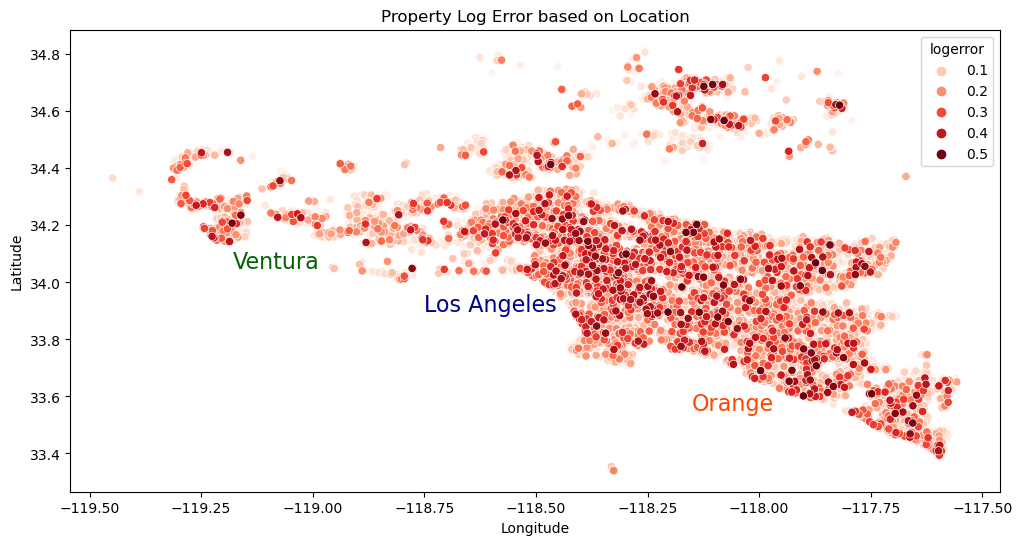

In [6]:
# is logerror sig diff for counties?
nova(train[train.county=='LA'].logerror,train[train.county=='Orange'].logerror,train[train.county=='Ventura'].logerror)
# sns.scatterplot(data=train,y='county',x='logerror')
# plt.show()
p = train.copy()
p = p.assign(lat=p.latitude/1000000)
p = p.assign(long=p.longitude/1000000)
p.logerror = abs(p.logerror)
# p = p.sort_values('logerror')
# make the size
plt.figure(figsize=[12,6])
# plots
sns.scatterplot(data=p.sort_values('logerror'),y='lat',x='long',hue='logerror',palette='Reds')
# plot county
plt.text(y=34.05,x=-119.18,s='Ventura',fontsize=16,color='darkgreen')
plt.text(y=33.9,x=-118.75,s='Los Angeles',fontsize=16,color='darkblue')
plt.text(y=33.55,x=-118.15,s='Orange',fontsize=16,color='orangered')
# give it a name
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Log Error based on Location')
plt.show()
# is diff

Spearman's R: taxvaluedollarcnt and logerror
 r = 0.018631007734187216, p = 0.0001493410788061191


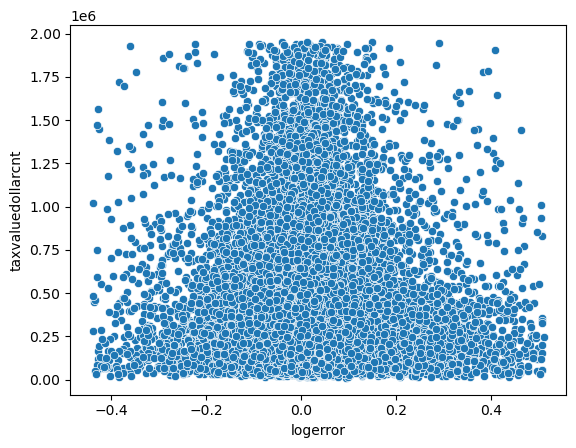

In [7]:
# is logerror corr with tax value?
pear(train,'taxvaluedollarcnt','logerror')
sns.scatterplot(data=train,y='taxvaluedollarcnt',x='logerror')
plt.show()
# is corr

Spearman's R: yearbuilt and logerror
 r = 0.028627737958082752, p = 5.623367552411225e-09


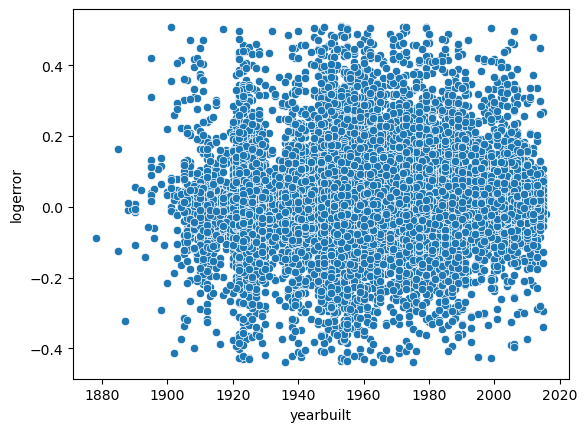

In [8]:
# is year and logerror corr?
pear(train,'yearbuilt','logerror')
sns.scatterplot(data=train,y='logerror',x='yearbuilt')
plt.show()
# is corr

Spearman's R: calculatedfinishedsquarefeet and logerror
 r = 0.07322991883929769, p = 2.3008603981769606e-50


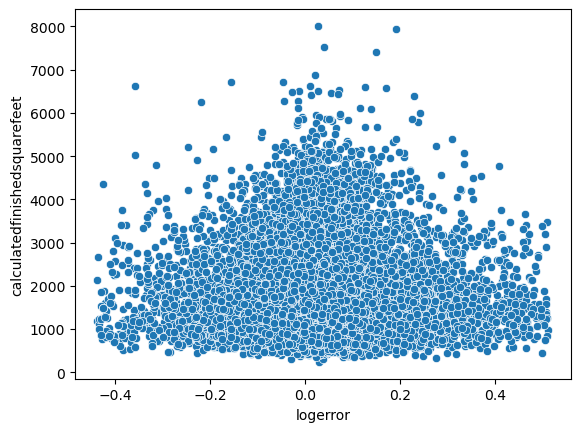

In [9]:
# is logerror corr with calculatedfinishedsquarefeet?
pear(train,'calculatedfinishedsquarefeet','logerror')
sns.scatterplot(data=train,x='logerror',y='calculatedfinishedsquarefeet')
plt.show()
# is corr

Kruskal-Wallis H-Test:
 stat = 10.284776846588304, p = 0.01629426210942788


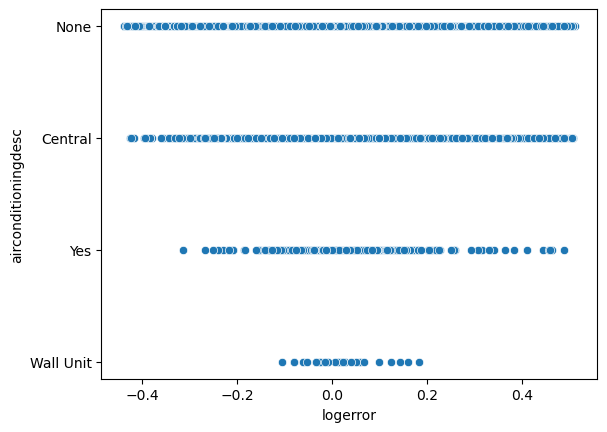

In [10]:
# is logerror sig diff for airconditioningdesc?
stat,p = stats.kruskal(train[train.airconditioningdesc=='None'].logerror,train[train.airconditioningdesc=='Central'].logerror,train[train.airconditioningdesc=='Yes'].logerror,train[train.airconditioningdesc=='Wall Unit'].logerror)
print("Kruskal-Wallis H-Test:\n", f'stat = {stat}, p = {p}')
sns.scatterplot(data=train,y='airconditioningdesc',x='logerror')
plt.show()
# is diff barely

#### Bonus:

#### Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [11]:
zip_log = train.groupby(['regionidzip']).agg(logerror_mean=('logerror', 'mean'))
zip_log

,logerror_mean
regionidzip,
95982,-0.011713
95983,0.008299
95984,-0.006242
95985,0.007478
95986,0.012333
...,...
97328,0.002902
97329,0.010222
97330,-0.007728


In [12]:
train.logerror.mean()

0.010080493707603812

In [13]:
sts = []
for zip in train.regionidzip.value_counts().index:
    lem = train[train.regionidzip==zip].logerror.mean()
    t,p = stats.ttest_1samp(train[train.regionidzip==zip].logerror,train.logerror.mean())
    output = {
        'zipcode':zip,
        'zip_count':train[train.regionidzip==zip].shape[0],
        'le_mean':lem,
        't_test_t':t,
        't_test_p':p
    }
    sts.append(output)
sts = pd.DataFrame(sts)
sts

/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_6163/965760200.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t,p = stats.ttest_1samp(train[train.regionidzip==zip].logerror,train.logerror.mean())
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,zipcode,zip_count,le_mean,t_test_t,t_test_p
0,97319,480,0.006287,-1.046410,0.295900
1,96987,461,0.015086,1.402053,0.161574
2,97318,429,0.006057,-0.809367,0.418754
3,96974,369,0.008066,-0.767775,0.443113
4,97118,356,0.013356,0.946407,0.344585
...,...,...,...,...,...
378,96002,5,0.000862,-0.976303,0.384196
379,96148,5,-0.019323,-2.606407,0.059645
380,97108,3,0.068815,1.586462,0.253532
381,96039,1,0.448323,NaN,NaN


# Extra explore

In [14]:
train

,yearbuilt,age,old_home,bathroomcnt,bedroomcnt,roomcnt,garagecarcnt,has_garage,calculatedfinishedsquarefeet,latitude,...,airconditioningdesc,heatingorsystemdesc,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,trx_month,trx_date,transactiondate
40811,1989.0,28.0,False,2.5,3.0,5.0,2.0,True,1200.0,33572695.0,...,None,Yes,259014.0,122350.0,136664.0,2635.82,0.036341,5,05-26,2017-05-26
32812,1950.0,67.0,True,3.0,3.0,6.0,1.0,True,2013.0,33635390.0,...,None,Yes,1345206.0,172540.0,1172666.0,14772.54,-0.030041,5,05-04,2017-05-04
67398,1923.0,94.0,True,1.0,2.0,3.0,0.0,False,1458.0,34168270.0,...,None,Central,543100.0,258508.0,284592.0,6340.89,0.113460,8,08-16,2017-08-16
56020,2008.0,9.0,False,2.5,4.0,7.0,2.0,True,2042.0,34249393.0,...,None,Yes,493006.0,172643.0,320363.0,12436.40,0.024404,7,07-11,2017-07-11
42105,1953.0,64.0,True,2.0,3.0,5.0,0.0,False,1169.0,33789326.0,...,None,Floor/Wall,257259.0,69470.0,187789.0,3157.74,-0.001838,6,06-01,2017-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64756,1961.0,56.0,True,3.0,4.0,7.0,0.0,False,2499.0,34165566.0,...,Central,Central,153255.0,106375.0,46880.0,1932.18,0.038169,8,08-09,2017-08-09
70587,1968.0,49.0,True,2.0,4.0,8.0,2.0,True,1715.0,34232429.0,...,None,Yes,201229.0,130807.0,70422.0,2156.28,-0.088120,8,08-25,2017-08-25
67662,1967.0,50.0,True,2.0,2.0,4.0,0.0,False,1108.0,33986600.0,...,None,Central,78651.0,53824.0,24827.0,1172.91,-0.019769,8,08-17,2017-08-17
74795,1979.0,38.0,True,2.0,2.0,4.0,1.0,True,1084.0,34270400.0,...,None,Yes,183978.0,91989.0,91989.0,2292.06,-0.003002,9,09-08,2017-09-08


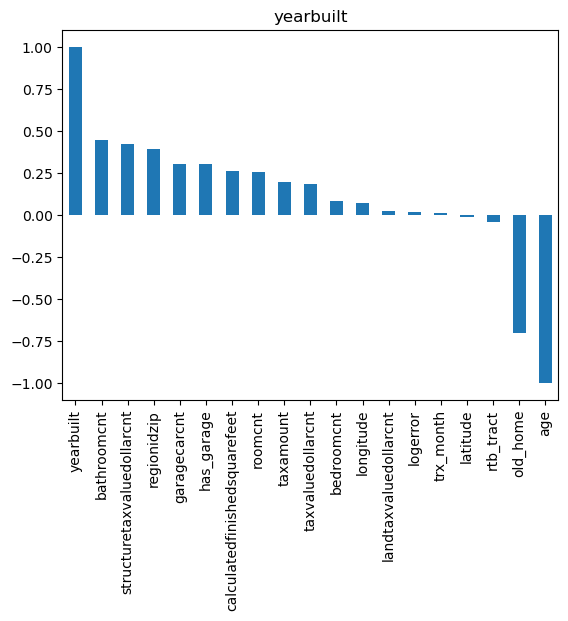

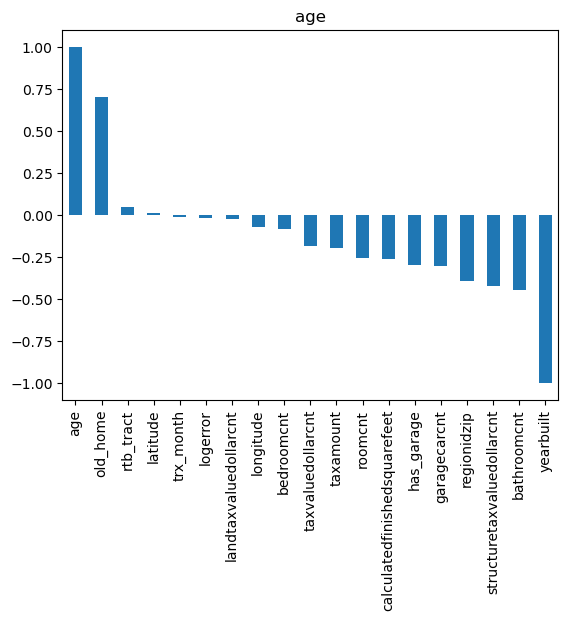

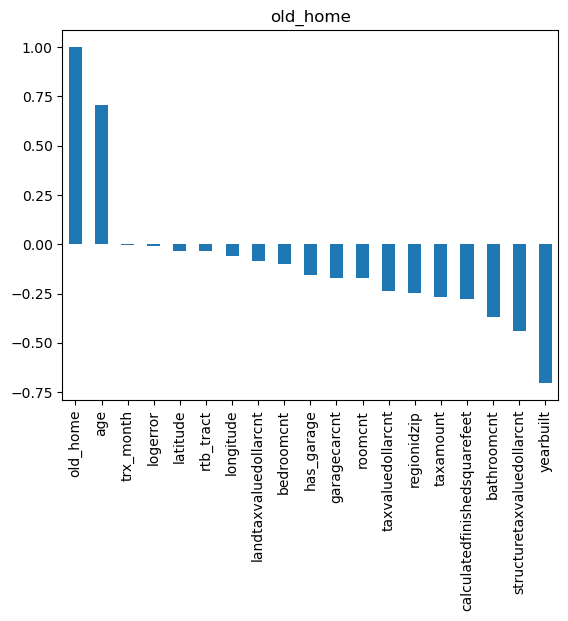

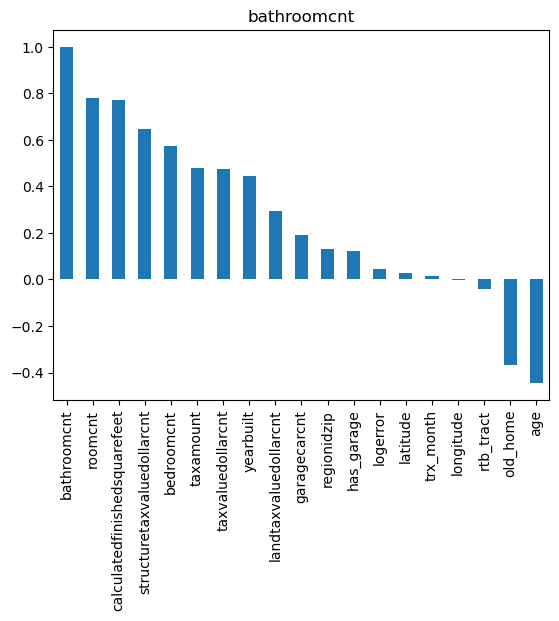

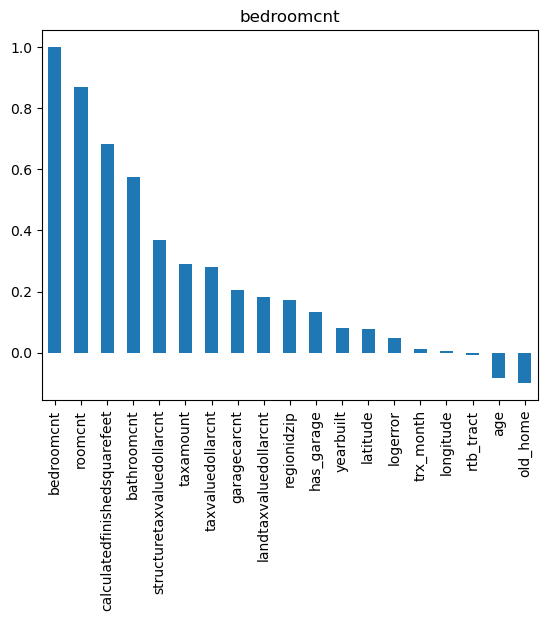

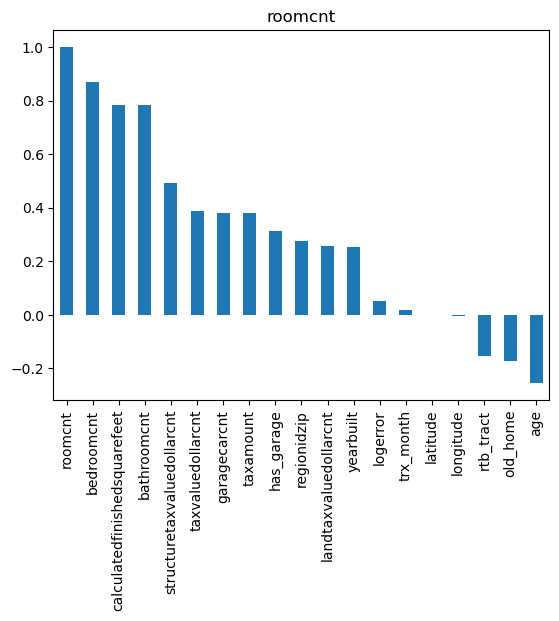

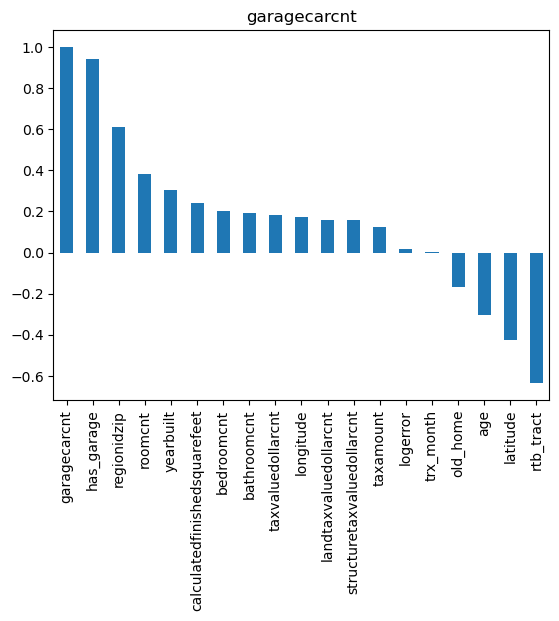

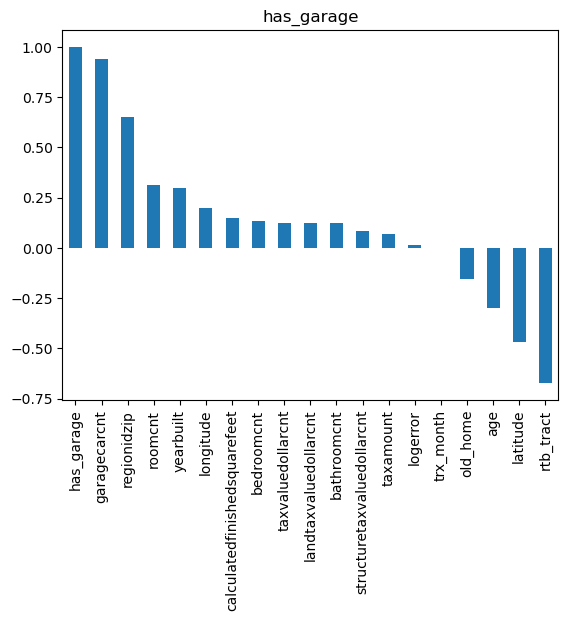

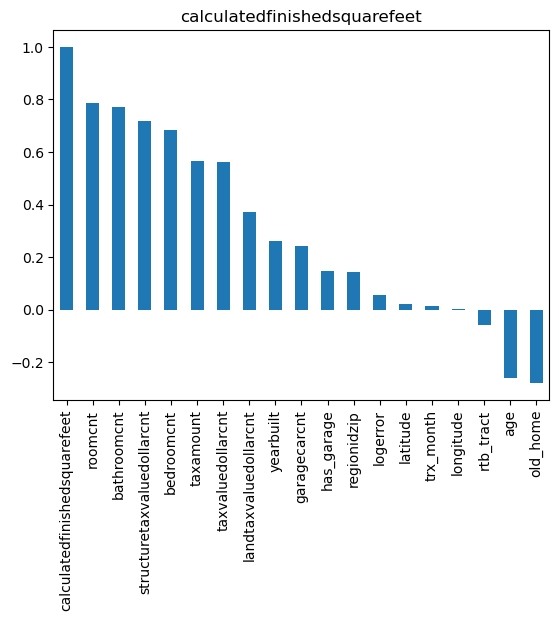

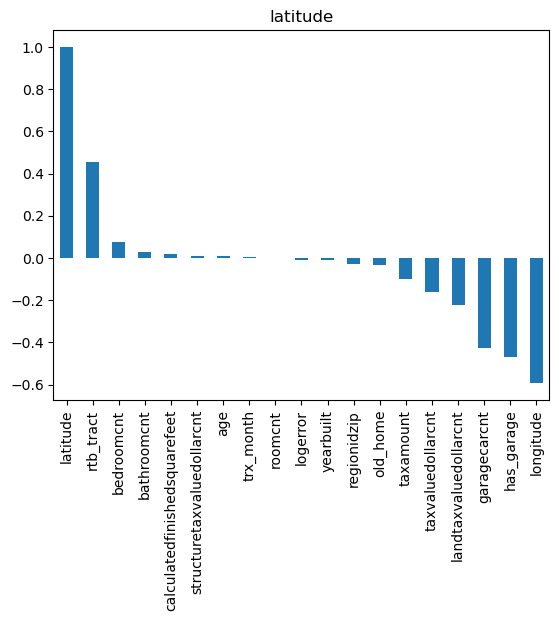

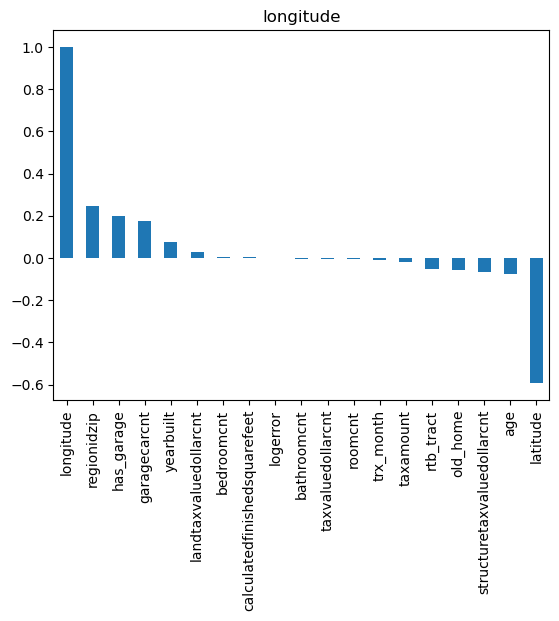

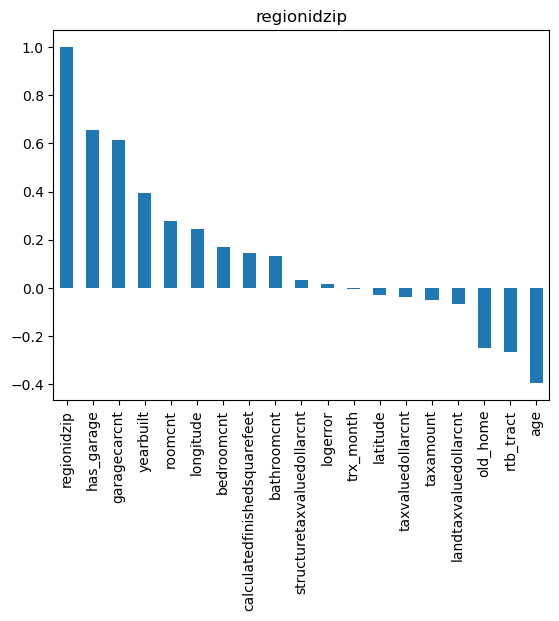

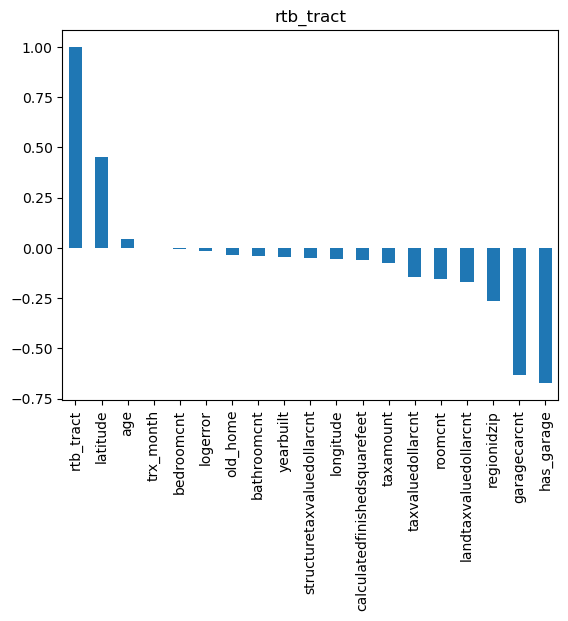

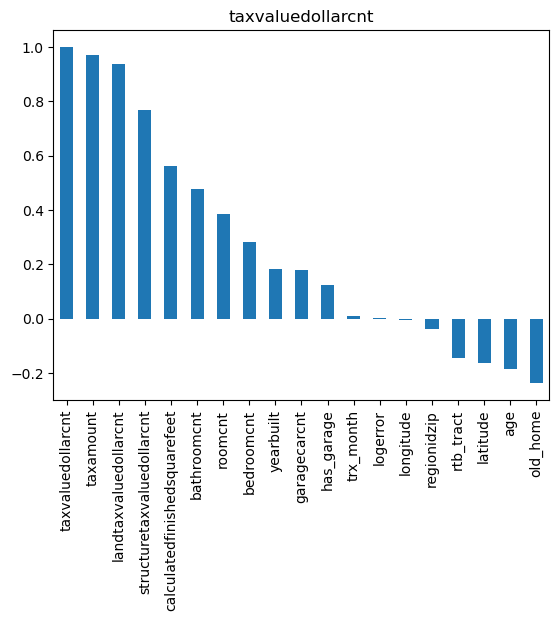

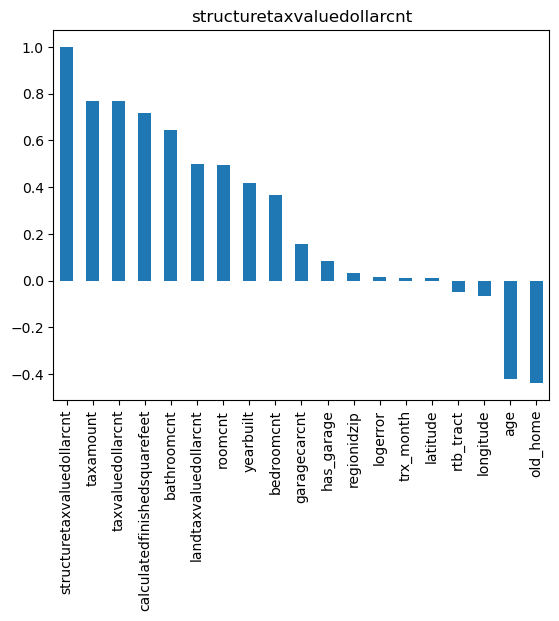

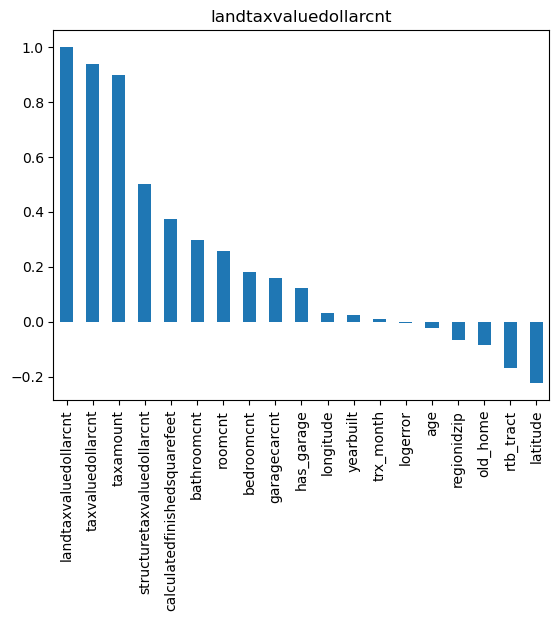

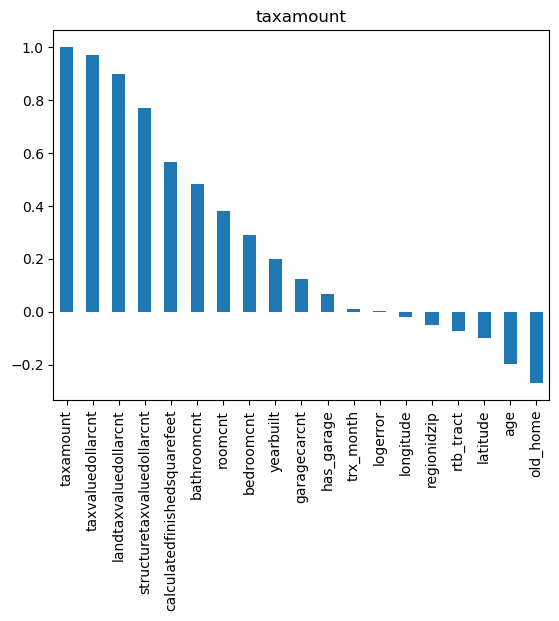

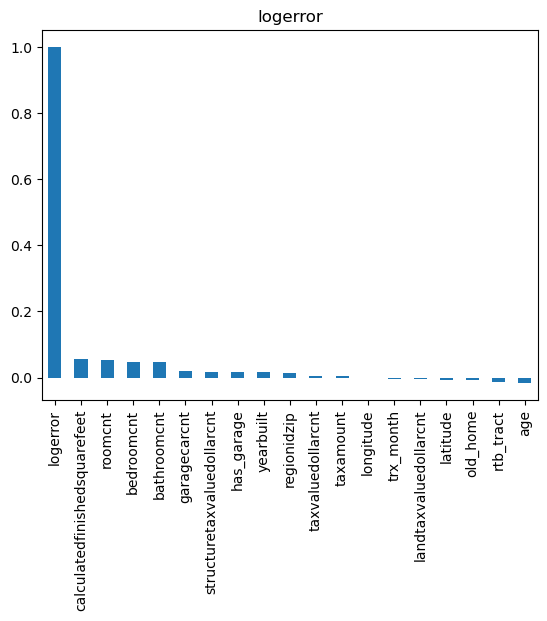

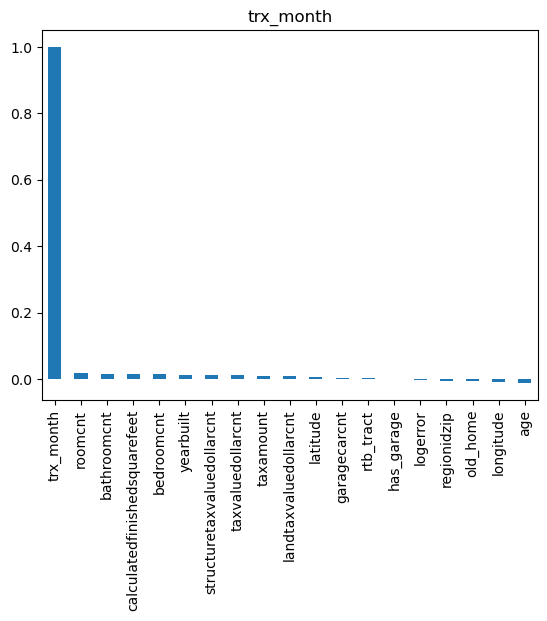

In [17]:
cols = train.select_dtypes(exclude=['object']).columns.to_list()
for col in cols:
    train.corr()[col].sort_values(ascending = False).plot(kind='bar')
    plt.title(col)
    plt.show()